## Aplicando PCA

#### Importando librerias.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [22]:
dataframe = pd.read_csv("13_septiembre_dataset/dataset_final_pca.csv")
dataframe = dataframe.drop(['CLASIFICACION_FINAL'], axis=1)
dataframe.tail(10)

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,...,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,UCI,DEFUNCION
110683,2,4,9,2,9,15,9,2,2,2,...,2,2,1,2,2,1,2,1,2,1
110684,2,5,24,2,24,24,20,2,2,2,...,2,2,2,2,2,2,2,2,2,1
110685,1,4,5,2,5,5,8,2,2,1,...,2,2,1,2,2,2,2,2,2,1
110686,2,12,31,2,31,31,100,2,1,1,...,2,2,2,2,2,2,2,2,2,0
110687,1,12,27,1,27,27,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
110688,1,4,19,2,27,19,18,2,2,1,...,2,2,2,2,2,2,2,1,2,0
110689,2,8,20,2,20,20,79,2,2,1,...,2,2,1,2,2,1,2,2,1,1
110690,2,12,24,1,24,24,35,2,2,1,...,2,2,2,2,2,2,2,2,2,0
110691,2,12,30,1,30,30,44,2,2,1,...,2,2,2,2,2,2,2,2,2,1
110692,1,4,29,1,29,29,24,2,2,2,...,2,2,1,2,2,2,2,2,2,0


In [23]:
#dataframe.drop(['ID_REGISTRO', 'FECHA_INGRESO', 'FECHA_SINTOMAS','FECHA_DEF','FECHA_ACTUALIZACION'], axis=1)
#df = dataframe.drop(['DEFUNCION','ID_REGISTRO', 'FECHA_INGRESO', 'FECHA_SINTOMAS','FECHA_DEF','FECHA_ACTUALIZACION','PAIS_NACIONALIDAD', 'NACIONALIDAD'], axis=1) # quito la variable dependiente "Y"
#df

### normalizamos los datos.

In [24]:
scaler=StandardScaler()
df = dataframe.drop(['DEFUNCION'], axis=1)
scaler.fit(df) # calculo la media para poder hacer la transformacion
X_scaled=scaler.transform(df)# Ahora si, escalo los datos y los normalizo
X_scaled

array([[-0.88634156,  1.28868957, -1.8641046 , ...,  0.22542494,
         0.28904507,  0.09873283],
       [ 1.12823322,  1.28868957, -1.00593345, ...,  0.22542494,
         0.28904507,  0.09873283],
       [ 1.12823322,  1.56000232,  0.34262122, ...,  0.22542494,
         0.28904507, -1.04387385],
       ...,
       [ 1.12823322,  1.28868957,  0.95560062, ...,  0.22542494,
         0.28904507,  0.09873283],
       [ 1.12823322,  1.28868957,  1.69117589, ...,  0.22542494,
         0.28904507,  0.09873283],
       [-0.88634156, -0.88181237,  1.56858001, ...,  0.22542494,
         0.28904507,  0.09873283]])

### Aplicamos PCA

In [25]:
pca=PCA(n_components=2)
#pca=PCA(.85)
pca.fit(X_scaled) # buscar los componentes principales
X_pca=pca.transform(X_scaled) 
#revisemos la forma del array
print("shape of X_pca", X_pca.shape)


shape of X_pca (110693, 2)


### datos antes y despues de la trasformada

In [26]:
print(dataframe.shape)
print(X_pca.data.shape)


(110693, 24)
(110693, 2)


### Veamos cuán buenos predictores son las nuevas dimensiones

In [27]:
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:2]))
#con 5 componentes tenemos algo mas del 85% de varianza explicada

[0.12313486 0.08453213]
suma: 0.20766699207745784


### graficamos la variacion explicada acumulada

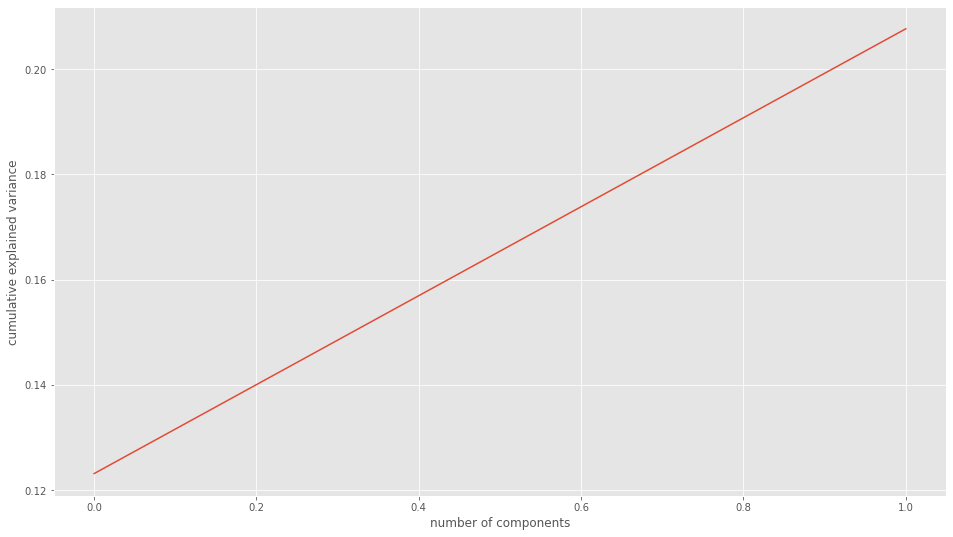

In [28]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### Una gráfica 2D, en donde el eje X e Y serán los 2 primero componentes principales obtenidos por PCA.

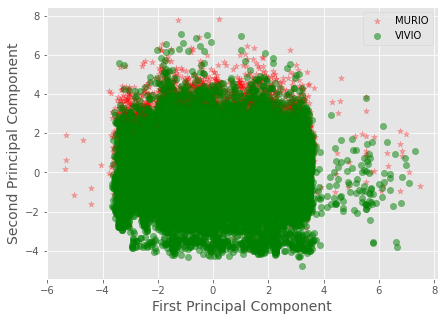

In [29]:
Xax=X_pca[:,0]
Yax=X_pca[:,1]
labels=dataframe['DEFUNCION'].values
#labels=[0,1] # Malignant, Beningn
cdict={0:'red',1:'green'}
labl={0:'MURIO',1:'VIVIO'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])

plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()

In [30]:
print(abs( pca.components_ )) #impacto entre mas alto el valor mayor importancia del atributo.

[[3.76497816e-03 6.52036496e-02 5.78004062e-01 1.20911195e-02
  5.08214447e-01 5.81359292e-01 2.37361804e-01 1.03397577e-25
  4.81826650e-02 8.36949572e-04 1.68344917e-02 2.05481342e-02
  2.00595797e-02 4.60268777e-04 1.49127826e-02 1.73321361e-02
  2.12278727e-02 1.94504515e-02 5.29333247e-03 3.51801190e-02
  3.14503723e-03 4.96056253e-02 1.94869832e-02]
 [5.28047171e-02 1.29020097e-01 2.33520065e-03 7.54287848e-02
  1.70879507e-02 9.99697173e-04 6.67275464e-02 0.00000000e+00
  1.68207324e-01 1.25461967e-01 4.52234869e-01 1.45900299e-01
  4.35978804e-01 2.26866568e-01 3.58558934e-02 8.70386848e-02
  5.23404415e-01 9.44035110e-02 2.73996037e-01 1.13260237e-01
  2.67065499e-01 8.80678014e-02 5.84015212e-03]]
